In [1]:
# Some ref to Kano Model:
#https://www.kanomodel.com/discovering-the-kano-model/
#https://foldingburritos.com/kano-model/

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.style
import matplotlib as mpl
import scipy.stats as stats
warnings.filterwarnings('ignore')
%matplotlib inline

#os.chdir('/Users/talbotm/Dropbox/python_working_files/SEM/si_concept_testing')
print(os.getcwd())

# helper functions

def clean_responses(concepts):
    for i in range(0,concepts.shape[0]):
        for j in range(0,concepts.shape[1]):
            if isinstance(concepts.iloc[i,j], str):
                if 'I like it' in concepts.iloc[i,j]:
                    concepts.iloc[i,j] = 'Like'
                elif 'I am neutral' in concepts.iloc[i,j]:
                    concepts.iloc[i,j] = 'Neutral'
                elif 'I can tolerate it' in concepts.iloc[i,j]:
                    concepts.iloc[i,j] = 'Live with'
                elif 'I expected' in concepts.iloc[i,j]:
                    concepts.iloc[i,j] = 'Expect'
                elif 'dislike' in concepts.iloc[i,j]:
                    concepts.iloc[i,j] = 'Dislike'
    return concepts   


def classify(f,d):
    v = ''
    if f == 'Like' and d == 'Like':
        v = 'Q'
    elif f == 'Like' and d == 'Expect':
        v =  'E'
    elif f == 'Like' and d == 'Neutral':
        v =  'E'
    elif f == 'Like' and d == 'Live with':
        v =  'E'
    elif f == 'Like' and d == 'Dislike':
        v =  'L'        
    elif f == 'Expect' and d == 'Like':
        v = 'R'
    elif f == 'Expect' and d == 'Expect':
        v =  'Q'
    elif f == 'Expect' and d == 'Neutral':
        v =  'I'
    elif f == 'Expect' and d == 'Live with':
        v =  'I'
    elif f == 'Expect' and d == 'Dislike':
        v =  'M' 
    elif f == 'Neutral' and d == 'Like':
        v = 'R'
    elif f == 'Neutral' and d == 'Expect':
        v =  'I'
    elif f == 'Neutral' and d == 'Neutral':
        v =  'I'
    elif f == 'Neutral' and d == 'Live with':
        v =  'I'
    elif f == 'Neutral' and d == 'Dislike':
        v =  'M'         
    elif f == 'Live with' and d == 'Like':
        v = 'R'
    elif f == 'Live with' and d == 'Expect':
        v =  'I'
    elif f == 'Live with' and d == 'Neutral':
        v =  'I'
    elif f == 'Live with' and d == 'Live with':
        v =  'Q'
    elif f == 'Live with' and d == 'Dislike':
        v =  'M' 
    elif f == 'Dislike' and d == 'Like':
        v = 'R'
    elif f == 'Dislike' and d == 'Expect':
        v =  'R'
    elif f == 'Dislike' and d == 'Neutral':
        v =  'R'
    elif f == 'Dislike' and d == 'Live with':
        v =  'R'
    elif f == 'Dislike' and d == 'Dislike':
        v =  'Q' 
    return v

def categorize_to_question_pairs(concepts):
    results = []
    for i in range(1,concepts.shape[1],2): 
        ar = []
        for j in range(0, int(concepts.shape[0])):
               ar.append(classify(concepts.iloc[j,i],concepts.iloc[j,i+1]))
        results.append(ar)
    return results



def get_score(type_, value_):
#Functional: -2 (Dislike), -1 (Live with), 0 (Neutral), 2 (Expect), 4 (Like);
#Dysfunctional: -2 (Like), -1 (Expect), 0 (Neutral), 2 (Live with), 4 (Dislike);
    resp = None
    if type_ == 'F':
        if value_ == 'Dislike':
            resp = -2
        elif value_ == 'Live with':
            resp = -1
        elif value_ == 'Neutral':
            resp = 0
        elif value_ == 'Expect':
            resp = 2
        elif value_ == 'Like':
            resp = 4
        else:
            resp = 999
    elif type_ == 'NF':
        if value_ == 'Dislike':
            resp = 4
        elif value_ == 'Live with':
            resp = 2
        elif value_ == 'Neutral':
            resp = 0
        elif value_ == 'Expect':
            resp = -1
        elif value_ == 'Like':
            resp = -2   
        else:
            resp = -999
    return resp
        

def score_to_question_pairs(concepts):
# returns mean and stdev of each concept
    means_f = []
    means_nf = []
    std_f = []
    std_nf = []
    for i in range(1,concepts.shape[1],2): 
        ar_f = []
        ar_nf = []
        for j in range(0, concepts.shape[0]):
            ar_f.append(get_score('F', concepts.iloc[j,i]))
            ar_nf.append(get_score('NF', concepts.iloc[j,i+1]))
        means_f.append(np.mean(ar_f))
        means_nf.append(np.mean(ar_nf))
        std_f.append(np.std(ar_f, ddof=1))
        std_nf.append(np.std(ar_nf, ddof=1))
    df =  pd.DataFrame({'Mean_f': np.round(means_f,3), 'Std_f': np.round(std_f,3), \
     'Mean_nf': np.round(means_nf,3), 'Std_nf': np.round(std_nf,3)})
    df.index = ['Draw_portal', 
                  'Play_pet', 
                  'Surprises', 
                  'Cinema_forest', 
                  'Collection', 
                  'Pictures', 
                  'Social_networks', 
                  'Research', 
                  'XPs', 
                  'Pencil', 
                  'Proximity join', 
                  'Battles']
    return df

def classification_count(results):
    q_class = []
    for ar in results:
        M, L, E, R, Q, I = 0, 0, 0, 0, 0,0
        for i in ar:
            if i == 'M':
                M = M + 1
            elif i == 'L':
                L = L + 1
            elif i == 'E':
                E = E + 1
            elif i == 'R':
                R = R + 1
            elif i == 'Q':
                Q = Q + 1
            elif i == 'I':
                I = I + 1
            else:
                 print('Unknown class: ', i)
        q_class.append([E, L, M, I, R, Q])
    return q_class

def distribution(cnt):
    f = lambda x, s : x/s
    l = []
    for i in cnt:
        l.append(list(map(lambda x, s : x/s, i, [sum(i)]*6)))
    return l 

def show_res(l):
    names = ['Draw_portal', 
                  'Play_pet', 
                  'Surprises', 
                  'Cinema_forest', 
                  'Collection', 
                  'Pictures', 
                  'Social_networks', 
                  'Research', 
                  'XPs', 
                  'Pencil', 
                  'Proximity join', 
                  'Battles']
    final_res = pd.DataFrame(columns = names, index = ['Exciter', 'Linear', 'Must-have', 'Indifferent', 'Reverse', 'Questionable'])
    for i in range(0,len(l)):
        final_res.iloc[:,i] = l[i]
    return final_res

/Users/talbotm/Documents/SEM/SEM Python & R code/Python & R code/Jupyter/user_research_code/si_july2018


In [3]:
data = pd.read_csv('Meta.csv', encoding='Latin1')
#removing garbage 
data = data.iloc[1:,:] #row 1
data = data.iloc[:,9:] #col 0:8
#breaking data into two parts & clearning cleaning data
story = data.iloc[:,0:5]
story.columns = ['ID', 'Part1', 'Part2', 'Part3', 'All']
s = story.iloc[:,1:].astype(int)
concepts = data.iloc[:, list(np.append([0], range(5,data.shape[1])))]
concepts = clean_responses(concepts)

In [8]:
concepts.describe().iloc[0,:]
concepts.drop(columns = ['Participant ID'])


,5. Comment te sens-tuÿsi le jeu a cette fonctionnalit?5. How do you feel if the game has this feature?,6. Comment te sens-tu si le jeu n'a pas cette fonctionnalit?6. How do you feel if the gameÿdoes not have this feature?,7. Comment te sens-tu si le jeu a cette fonctionnalit?7. How do you feel if the game has this feature?,8. Comment te sens-tu si le jeu n'a pas cette fonctionnalit?8. How do you feel if the game does not have this feature?,9. Comment te sens-tuÿsi le jeu a cette fonctionnalit?9. How do you feel if the game has this feature?,10. Comment te sens-tu si le jeu n'a pas cette fonctionnalit?10. How do you feel if the game does not have this feature?,11. Comment te sens-tuÿsi le jeu a cette fonctionnalit?11. How do you feel if the game has this feature?,12. Comment te sens-tu si le jeu n'a pas cette fonctionnalit?12. How do you feel if the game does not have this feature?,13. Comment te sens-tuÿsi le jeu a cette fonctionnalit?13. How do you feel if the game has this feature?,14. Comment te sens-tu si le jeu n'a pas cette fonctionnalit?14. How do you feel if the game does not have this feature?,...,19. Comment te sens-tuÿsi le jeu a cette fonctionnalit?19. How do you feel if the game has this feature?,20. Comment te sens-tu si le jeu n'a pas cette fonctionnalit?20. How do you feel if the game does not have this feature?,21. Comment te sens-tuÿsi le jeu a cette fonctionnalit?21. How do you feel if the game has this feature?,22. Comment te sens-tu si le jeu n'a pas cette fonctionnalit?22. How do you feel if the game does not have this feature?,23. Comment te sens-tuÿsi le jeu a cette fonctionnalit?23. How do you feel if the game has this feature?,24. Comment te sens-tu si le jeu n'a pas cette fonctionnalit?24. How do you feel if the game does not have this feature?,25. Comment te sens-tu si le jeu a cette fonctionnalit?25. How do you feel if the game has this feature?,26. Comment te sens-tu si le jeu n'a pas cette fonctionnalit?26. How do you feel if the game does not have this feature?,27. Comment te sens-tu si le jeu a cette fonctionnalit?27. How do you feel if the game has this feature?,28. Comment te sens-tu si le jeu n'a pas cette fonctionnalit?28. How do you feel if the game does not have this feature?
1,Like,Live with,Neutral,Neutral,Like,Dislike,Like,Dislike,Expect,Dislike,...,Neutral,Neutral,Like,Neutral,Neutral,Neutral,Like,Dislike,Like,Dislike
2,Like,Expect,Dislike,Expect,Dislike,Expect,Dislike,Expect,Live with,Like,...,Neutral,Neutral,Like,Live with,Expect,Like,Dislike,Like,Expect,Dislike
3,Like,Neutral,Expect,Dislike,Like,Dislike,Like,Dislike,Like,Dislike,...,Like,Dislike,Like,Neutral,Like,Neutral,Like,Neutral,Like,Neutral
4,Neutral,Neutral,Like,Live with,Like,Dislike,Expect,Dislike,Expect,Dislike,...,Like,Dislike,Expect,Neutral,Dislike,Like,Expect,Live with,Neutral,Dislike
5,Like,Neutral,Like,Dislike,Like,Live with,Like,Dislike,Expect,Live with,...,Neutral,Neutral,Dislike,Neutral,Live with,Neutral,Like,Neutral,Expect,Live with
6,Like,Neutral,Live with,Neutral,Like,Live with,Dislike,Like,Neutral,Neutral,...,Like,Live with,Dislike,Like,Dislike,Like,Live with,Neutral,Like,Neutral
7,Expect,Live with,Expect,Live with,Like,Dislike,Expect,Dislike,Expect,Dislike,...,Expect,Live with,Like,Live with,Expect,Dislike,Like,Live with,Expect,Dislike
8,Expect,Neutral,Dislike,Neutral,Like,Live with,Expect,Dislike,Expect,Dislike,...,Like,Neutral,Dislike,Like,Live with,Like,Like,Neutral,Expect,Dislike
9,Neutral,Neutral,Like,Dislike,Like,Live with,Like,Live with,Like,Dislike,...,Like,Live with,Expect,Dislike,Like,Dislike,Neutral,Neutral,Like,Dislike
10,Like,Neutral,Expect,Neutral,Like,Live with,Like,Neutral,Like,Live with,...,Like,Neutral,Like,Neutral,Expect,Neutral,Like,Neutral,Like,Live with


In [5]:
stats.f_oneway(s.Part1, s.Part2, s.Part3)
# Fail to reject Ho: no difference in the means

F_onewayResult(statistic=2.521502591022186, pvalue=0.08926636634363014)

In [6]:
stats.kruskal(s.Part1, s.Part2, s.Part3)
# no need to run this test, since it's power is lower than ANOVA. 
# Also, no need to test for Normality and Homostaticity since we fail to reject Ho
# I ran kruskal anyway: Fail to reject Ho.

KruskalResult(statistic=3.6534123143667774, pvalue=0.16094281600481355)

In [7]:
# running a post hoc test to determine which Part is marginally different
# Part 1 is marginaly different than Part 2 (alpha  = 0.095)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as multi
mc = multi.MultiComparison(pd.melt(s).value.values, pd.melt(s).variable.values)
poshoc = mc.tukeyhsd(alpha=0.095)
print(poshoc)

Multiple Comparison of Means - Tukey HSD,FWER=0.10
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
 All   Part1    0.2    -17.6359 18.0359 False 
 All   Part2   -17.7   -35.5359  0.1359 False 
 All   Part3   -6.25   -24.0859 11.5859 False 
Part1  Part2   -17.9   -35.7359 -0.0641  True 
Part1  Part3   -6.45   -24.2859 11.3859 False 
Part2  Part3   11.45   -6.3859  29.2859 False 
----------------------------------------------


In [8]:
# computing power

#effect_size (float) – standardized effect size difference between the two means divided by the standard deviation. 
# effect_size has to be positive. Here the means are from Part 1 and Part 2 because of the tuckeyhsd test above

effect_size = (s.describe().iloc[1,:][0]-s.describe().iloc[1,:][1])/s.describe().iloc[2,:][1]
from statsmodels.stats import power
print('Number of Participants needed: {}'.format(np.ceil(power.tt_ind_solve_power(effect_size, alpha =0.05, power=0.8))))

Number of Participants needed: 47.0


In [9]:
s.describe()

,Part1,Part2,Part3,All
count,20.000000,20.000000,20.000000,20.000000
mean,72.700000,54.800000,66.250000,72.500000
std,21.356868,30.584826,23.750623,18.449076
min,6.000000,6.000000,7.000000,21.000000
25%,71.750000,29.250000,53.750000,64.000000
50%,75.000000,56.500000,74.000000,74.000000
75%,83.000000,78.000000,82.500000,82.500000
max,100.000000,100.000000,99.000000,100.000000


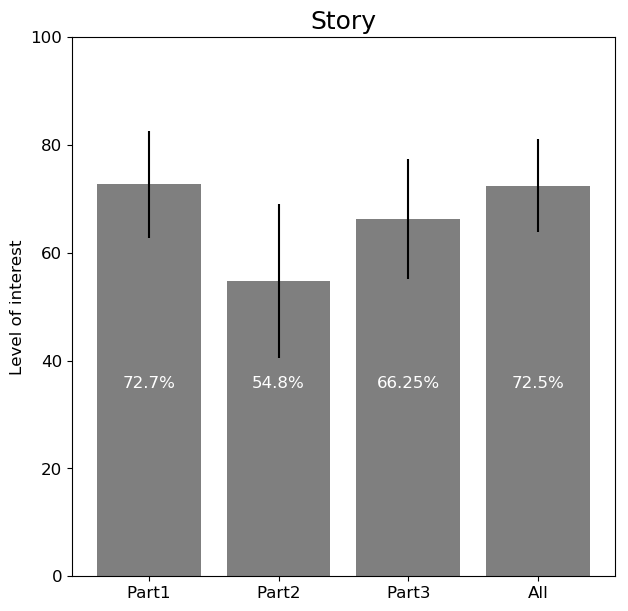

In [98]:
def ci(s):
    #avg = s.mean().values
    n = s.shape[0]
    t_stat = stats.t.ppf(1-0.025, n-1)  # 2-tail, p < 0.05
    st_dev = s.std(ddof=1).values
    intervals_half_width = t_stat * st_dev / np.sqrt(n)
    return intervals_half_width

font_size = 12
parts = s.columns
y_pos = np.arange(len(parts))
fig, ax = plt.subplots(1,1,figsize=(7,7), facecolor = 'White')
ax.bar(y_pos, s.mean().values, yerr=ci(s), align='center', alpha=0.5, color = 'black', ecolor = 'black')
ax.set_xticks(y_pos)
ax.set_xticklabels(parts, fontsize = font_size)

ax.set_yticklabels([0, 20, 40, 60, 80, 100],fontsize=font_size)
ax.set_ylim([0,100])
# printing the mean values on each bar
for i, v in enumerate(s.mean().values):
    ax.text(i, 35, str(v) + '%', fontsize = font_size, ha='center', color = 'white')
ax.set_ylabel('Level of interest', fontsize = font_size)
ax.set_title('Story', fontsize = font_size*1.5)
plt.savefig('story.png', bbox_inches='tight')

In [44]:
# computing scores and making negative mean equal 0 (so they are visible on the graph)
sc = score_to_question_pairs(concepts)
sc.Mean_f[sc.Mean_f < 0] = 0
sc.Mean_nf[sc.Mean_nf < 0] = 0
sc

,Mean_f,Std_f,Mean_nf,Std_nf
Draw_portal,3.30,1.342,0.45,0.945
Play_pet,1.60,2.371,1.25,1.916
Surprises,3.40,1.465,2.45,1.669
Cinema_forest,2.60,1.957,1.75,2.099
Collection,2.35,1.496,3.00,1.777
Pictures,0.70,2.029,0.75,1.410
Social_networks,0.30,1.559,0.45,1.605
Research,2.40,2.113,1.00,1.376
XPs,1.30,2.494,1.15,2.033
Pencil,1.50,2.306,0.00,1.824


Text(3.5,1.8,'Must have')

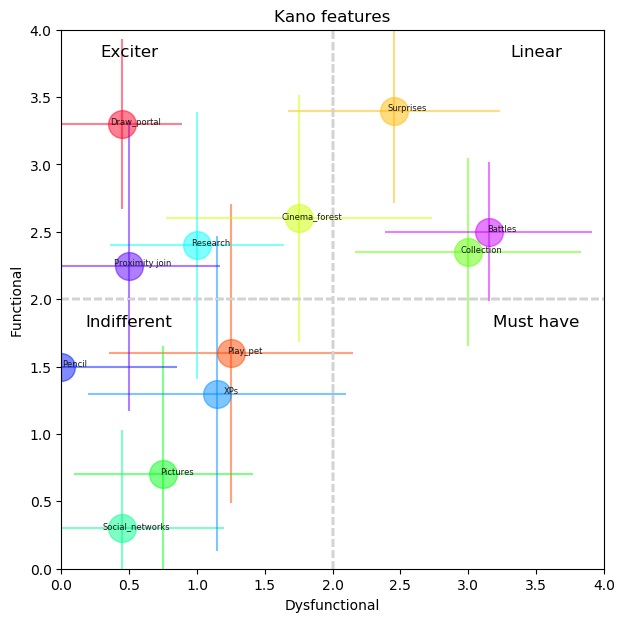

In [45]:
def ci_array(s):
    n = len(s)
    t_stat = stats.t.ppf(1-0.025, n-1)  # 2-tail, p < 0.05
    st_dev = s.std(ddof=1)
    intervals_half_width = t_stat * st_dev / np.sqrt(n)
    return intervals_half_width

def ci_(v, n):
     return stats.t.ppf(1-0.025, n-1)*v/np.sqrt(n)


# x is nf, y is f
x = sc.Mean_nf
y = sc.Mean_f
names = sc.index
# ci on every point
yerr = ci_array(sc.Std_nf)
xerr = ci_array(sc.Std_f)


# plotting results
NUM_COLORS = 12
cm = plt.get_cmap('gist_rainbow')
colors_ = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
mpl.style.use('default')
# First illustrate basic pyplot interface, using defaults where possible.
plt.figure(facecolor = 'White', figsize = [7,7])
for i in range(len(x)):
    plt.errorbar(x[i], y[i], fmt = 'o', xerr=ci_(sc.Std_nf[i], 20), yerr=ci_(sc.Std_f[i],20), capthick=.5, \
                 ecolor = colors_[i], mec = colors_[i], c = colors_[i], ms=20, alpha = .5)
    plt.text(x[i]+.1, y[i], names[i], fontsize = font_size/2, ha='center', color = (0.1,0.1,0.1))
    plt.vlines(2, 0, 4, colors='k', linestyles='dashed', color = 'lightgray')
    plt.hlines(2, 0, 4, colors='k', linestyles='dashed', color = 'lightgray')
plt.title("Kano features");
plt.xlabel('Dysfunctional')
plt.ylabel('Functional')
plt.ylim([0,4])
plt.xlim([0,4])
plt.text(0.5, 3.8, 'Exciter', fontsize = font_size, ha='center')
plt.text(3.5, 3.8, 'Linear', fontsize = font_size, ha='center')
plt.text(0.5, 1.8, 'Indifferent', fontsize = font_size, ha='center')
plt.text(3.5, 1.8, 'Must have', fontsize = font_size, ha='center')

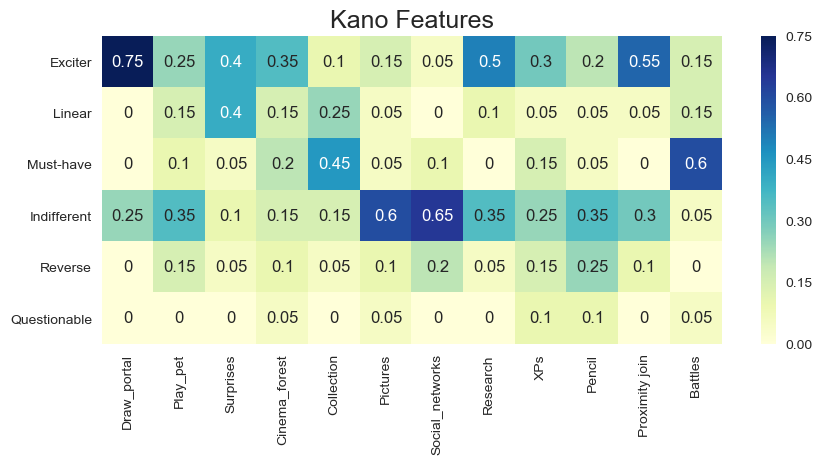

In [239]:
# doing the work on concepts
results = categorize_to_question_pairs(concepts)
cnt = classification_count(results)
distr = distribution(cnt)
final = show_res(distr)

import seaborn as sns; sns.set()
fig, ax = plt.subplots(figsize=[10,4]);
sns.heatmap(final,cmap="YlGnBu", annot = True);
plt.title('Kano Features', fontsize = font_size*1.5)
plt.savefig('Kano_matrix.png', bbox_inches='tight')
#https://foldingburritos.com/kano-model/
#Exciter:  They delight the customer when there, but do not cause any dissatisfaction when missing because the customer never expected them in the first place
#Linear: The better you execute these, the more satisfaction from the customer you get.
#Must-Have: When execution is poor, satisfaction is low and when execution is done well, satisfaction is neutral.
#Indiferent: These are the requirements that most customers simply don’t care about whether they are present or absent, their satisfaction remains nutral under either circumstance
#Reverse: These are the requirements that cause dissatisfaction when present and satisfaction when absent. They are the features or attributes that cause customers to say “I hate when they do that”. 
#Questionnable: Inconsistency in the respondent's response

# it’s important to take note of a fundamental fact: they are not static — they change over time.

In [15]:
final.to_csv('kano.csv')
s.describe().to_csv('story.csv')
s.describe()

,Part1,Part2,Part3,All
count,20.000000,20.000000,20.000000,20.000000
mean,72.700000,54.800000,66.250000,72.500000
std,21.356868,30.584826,23.750623,18.449076
min,6.000000,6.000000,7.000000,21.000000
25%,71.750000,29.250000,53.750000,64.000000
50%,75.000000,56.500000,74.000000,74.000000
75%,83.000000,78.000000,82.500000,82.500000
max,100.000000,100.000000,99.000000,100.000000


In [5]:
plt.rcParams.keys()


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.

# Qualitative results from paper


In [6]:
print(os.getcwd())
rank1 = pd.read_excel('SI - Invaders Score and Ranks mt.xlsx', index_col=None, sheetname = 1)
rank2 = pd.read_excel('SI - Invaders Score and Ranks mt.xlsx', index_col=None, sheetname = 2)
score1 = pd.read_excel('SI - Invaders Score and Ranks mt.xlsx', index_col=None, sheetname = 3)
score2 = pd.read_excel('SI - Invaders Score and Ranks mt.xlsx', index_col=None, sheetname = 4)

S:\Projects\BI\Jupyter\user_research_code\si_july2018


In [7]:
rank1.index = rank1.Type
rank2.index = rank2.Type
score1.index = score1.Type
score2.index = score2.Type
rank1.drop('Type', axis=1, inplace = True)
rank2.drop('Type', axis=1, inplace = True)
score1.drop('Type', axis=1, inplace = True)
score2.drop('Type', axis=1, inplace = True)

Error rate: 23.333%


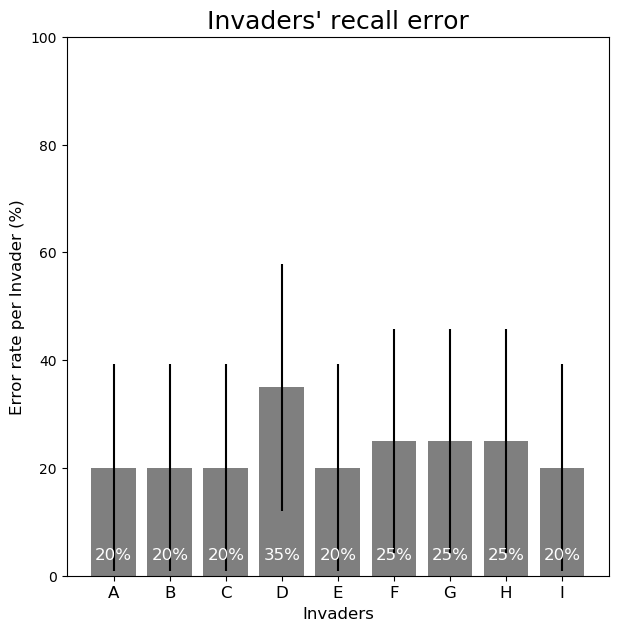

In [8]:
'Recall error Rank rate'

delta = []
for i in range(rank1.shape[1]):
    delta.append(np.abs(rank2.iloc[:,i] - rank1.iloc[:,i]))
df_delta = pd.DataFrame(delta)
error_ = np.sum(df_delta[df_delta > 0].count())/(df_delta.shape[0]*df_delta.shape[1])

# mesure du 1,2,... 8,9 et dernier...
for i in range(len(delta)):
    for j in range(len(np.array(delta).T.tolist())):
           if(delta[i][j] > 0):
                delta[i][j] = 1
                
means_ = pd.DataFrame(delta).mean(axis = 0)*100 
stds_ = pd.DataFrame(delta).std(axis = 0, ddof = 1)*100
cnts_ = pd.DataFrame(delta).count(axis = 0)

print("Error rate: {}%".format(round(error_*100,3)))

invaders = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']    
def ci(mean, std, n):
    return stats.t.ppf(1-0.025, n-1) * std / np.sqrt(n)

ci_s = []
for m,c,s in zip(means_, stds_, cnts_):
    ci_s.append(ci(m,c,s))
ci_s

mpl.style.use('default')
font_size = 12
y_pos = np.arange(len(invaders))
fig, ax = plt.subplots(1,1,figsize=(7,7), facecolor = 'White')
ax.bar(y_pos, means_, yerr=ci_s, align='center', alpha=0.5, color = 'black', ecolor = 'black')
ax.set_xticks(y_pos)
ax.set_xticklabels(invaders, fontsize = font_size)

#ax.set_yticklabels([0, 20, 40, 60, 80, 100],fontsize=font_size)
ax.set_ylim([0,100])
# printing the mean values on each bar
for i, v in enumerate(means_):
        ax.text(i, 3, str(int(v))+'%', fontsize = font_size, ha='center', color = 'white')
ax.set_xlabel('Invaders', fontsize = font_size)    
ax.set_ylabel('Error rate per Invader (%)', fontsize = font_size)
ax.set_title("Invaders' recall error", fontsize = font_size*1.5)
plt.savefig("Invaders' recall erro.png", bbox_inches='tight')

Total emotion boost on all invaders: 2390


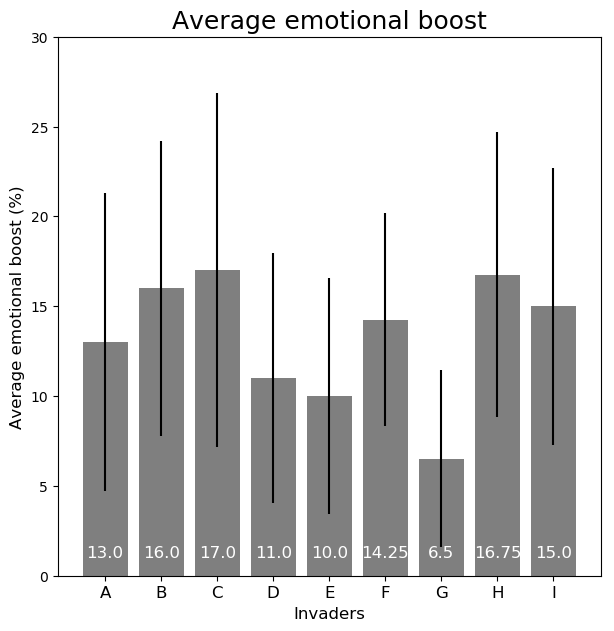

In [9]:
delta = []
for i in range(score1.shape[1]):
    delta.append(np.abs(score2.iloc[:,i] - score1.iloc[:,i]))
df_delta = pd.DataFrame(delta)
error_ = np.sum(df_delta[df_delta > 0].count())/(df_delta.shape[0]*df_delta.shape[1])
#print('Emotion effect on Score rate: {}%'.format(round(error_*100,1)))
print('Total emotion boost on all invaders: {}'.format(sum(sum(delta))))

delta = []
for i in range(score1.shape[1]):
    delta.append(np.abs(score2.iloc[:,i] - score1.iloc[:,i]))

#print('Total emotion effect boost on all invaders {}%'.format(sum(means_)),1)


means_ = pd.DataFrame(delta).mean(axis = 0) 
stds_ = pd.DataFrame(delta).std(axis = 0, ddof = 1)
cnts_ = pd.DataFrame(delta).count(axis = 0)

invaders = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']    
def ci(mean, std, n):
    return stats.t.ppf(1-0.025, n-1) * std / np.sqrt(n)

ci_s = []
for m,c,s in zip(means_, stds_, cnts_):
    ci_s.append(ci(m,c,s))
ci_s

font_size = 12
y_pos = np.arange(len(invaders))
fig, ax = plt.subplots(1,1,figsize=(7,7), facecolor = 'White')
ax.bar(y_pos, means_, yerr=ci_s, align='center', alpha=0.5, color = 'black', ecolor = 'black')
ax.set_xticks(y_pos)
ax.set_xticklabels(invaders, fontsize = font_size)

#ax.set_yticklabels([0, 20, 40, 60, 80, 100],fontsize=font_size)
ax.set_ylim([0,30])
# printing the mean values on each bar
for i, v in enumerate(means_):
        ax.text(i, 1, v, fontsize = font_size, ha='center', color = 'white')
    
ax.set_ylabel('Average emotional boost (%)', fontsize = font_size)
ax.set_xlabel('Invaders', fontsize = font_size)
ax.set_title("Average emotional boost", fontsize = font_size*1.5)
plt.savefig('Average emotional boost.png', bbox_inches='tight')
    

In [302]:
rank1b = (rank1.T.describe().sort_values(['mean'],axis = 1))
rank1 = rank1b


In [306]:

means_ = rank1.T.describe().loc['mean', :].values
stds_ = rank1.T.describe().loc['std', :].values
cnts_ = rank1.T.describe().loc['count', :].values

invaders = rank1.columns  
def ci(mean, std, n):
    return stats.t.ppf(1-0.025, n-1) * std / np.sqrt(n)

ci_s = []
for m,c,s in zip(means_, stds_, cnts_):
    ci_s.append(ci(m,c,s))
ci_s

# mpl.style.use('default')
# font_size = 12
# y_pos = np.arange(len(invaders))
# fig, ax = plt.subplots(1,1,figsize=(7,7), facecolor = 'White')
# ax.bar(y_pos, means_, yerr=ci_s, align='center', alpha=0.5, color = 'black', ecolor = 'black')
# ax.set_xticks(y_pos)
# ax.set_xticklabels(invaders, fontsize = font_size)

# #ax.set_yticklabels([0, 20, 40, 60, 80, 100],fontsize=font_size)
# ax.set_ylim([0,10])
# # printing the mean values on each bar
# for i, v in enumerate(means_):
#         ax.text(i, 1, str(int(v))+'%', fontsize = font_size, ha='center', color = 'white')
# ax.set_xlabel('Invaders', fontsize = font_size)    
# ax.set_ylabel('Ranking (lowest is best)', fontsize = font_size)
# ax.set_title("Invaders' recall error", fontsize = font_size*1.5)
# plt.savefig("Invaders' recall erro.png", bbox_inches='tight')

[0.0,
 1.0972046404252678,
 0.21440520142911992,
 0.5584243882220769,
 1.2783079008837497,
 1.3738410751676462,
 1.2942574622494136,
 0.3389507479769392]